<a href="https://colab.research.google.com/github/Chanunchida-May/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [19]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [18]:
Name = 'ชนัญชิดา เมธีกุลมานิต'
ID = '6230205161'

In [20]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [21]:
Data = DataGenerator(Name,ID)

020:30:21


In [22]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0.075284,-4.698610,-1.796113,2.573403,5.392528,10.443115,2.936573,-0.189635,-7.934688,-0.762363,-2.573792,-5.407818,3.099271,9.654666,4.113177,1.498262,1.743397,8.195469,9.271724,5.936310,-4.687235,-4.340322,9.866275,0.468506,-0.754849,1.375600,4.734555,5.078867,0.523719,8.083784,-9.397219,42.418922
1,2.256112,8.518886,8.979545,7.161781,-10.400533,3.802111,-1.000701,0.184998,2.001371,-7.012582,-4.228139,4.328138,5.361476,6.371868,5.568158,-8.445997,-8.090063,4.859351,-5.967270,-4.406233,5.934493,10.004309,-0.279969,-6.497705,6.070259,2.203129,3.469625,6.208171,0.377686,0.121612,17.037773,2.608059
2,-4.591993,-10.669221,-3.033714,-7.941222,-3.385107,1.151519,-8.766998,-10.024388,3.863638,1.385751,-3.745489,-3.573622,-0.792904,-1.293412,-6.647738,11.117316,8.177635,6.614461,-9.780989,-9.422319,-8.674050,0.682759,3.058647,4.731224,5.171247,3.373287,-9.048570,0.863685,5.630171,-5.956894,-21.338442,-27.784471
3,4.758277,4.650678,3.417744,7.633664,-2.668778,-8.866351,6.640300,8.029495,-0.190749,6.538543,-1.583843,8.216617,4.404266,1.673135,10.348315,9.928181,6.842507,-2.705591,-9.555843,6.733607,-8.028439,-5.219506,-3.808931,9.797888,-4.350369,-3.533076,-2.854182,-8.573982,0.189384,-8.423114,9.301356,-40.115568
4,4.064698,7.523146,-9.102260,-6.640667,9.335034,1.352716,9.313866,2.225078,5.140301,-2.074142,5.902454,-0.412591,-2.478493,-2.306601,-0.877745,7.565374,-1.823563,-2.281004,-2.832499,1.272504,2.267397,-6.968854,2.769761,-4.333420,8.371068,-8.833340,5.678846,-2.901228,-8.408941,5.386016,15.046292,28.930082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-7.138307,4.983342,1.339236,8.088569,-10.446501,-5.529515,10.334767,-7.225092,4.129994,-0.540194,-9.210808,3.844797,6.914146,0.271029,-5.131648,-5.780360,6.674650,6.924942,6.454967,9.115160,-4.490058,-4.422617,-2.889046,-7.533495,-7.009099,-1.219168,-7.463350,7.159741,5.096300,-7.878508,9.966685,-37.392539
9996,9.447729,-10.343070,-7.072834,-2.435520,6.592739,12.163324,8.033275,3.114361,-2.093757,-0.516587,3.299198,4.476070,7.310476,-2.404773,7.754966,6.011323,-5.071566,2.357294,8.332472,-11.877982,-7.461121,8.524154,7.137896,5.009467,5.933162,-6.094294,-7.637146,5.677159,-0.870917,4.543106,-20.686139,24.715530
9997,3.311942,2.666463,3.484471,5.891362,-2.491019,-9.337824,5.691715,5.384492,0.614234,7.759929,-0.842790,5.305373,4.363303,2.617577,10.079838,7.306719,7.019005,-1.421492,-10.933845,7.932982,-9.746023,-1.886430,-4.153681,8.732104,-6.278363,-4.614760,-3.915977,-9.051466,1.071257,-9.172472,5.332926,-43.862361
9998,1.248170,-7.797526,5.100480,11.057906,-0.959574,2.284569,-2.644382,6.240631,-8.954249,7.577219,6.391494,-0.025679,1.956391,5.588021,0.656975,-2.679199,-6.405252,5.709901,3.584074,0.743031,8.051099,-5.383952,-3.905264,-4.378429,-3.166401,3.127415,-9.488871,2.606443,3.857692,-10.920978,-15.595052,-52.604891


In [23]:
Data.shape  #ใช้shapeเพื่อดูขนาดของข้อมูลที่ได้จากการรันข้อมูลในตาราง


(10000, 32)

###ตัดข้อมูลที่มีค่า correlation ที่ซ้ำกันออกไป

In [24]:
corr = np.corrcoef(Data.to_numpy().T) 

In [25]:
corr.shape

(32, 32)

In [26]:
corr

array([[ 1.        , -0.06850629, -0.06230606, ...,  0.22951115,
        -0.06850629,  0.22951115],
       [-0.06850629,  1.        ,  0.21659398, ...,  0.02084469,
         1.        ,  0.02084469],
       [-0.06230606,  0.21659398,  1.        , ..., -0.10562785,
         0.21659398, -0.10562785],
       ...,
       [ 0.22951115,  0.02084469, -0.10562785, ...,  1.        ,
         0.02084469,  1.        ],
       [-0.06850629,  1.        ,  0.21659398, ...,  0.02084469,
         1.        ,  0.02084469],
       [ 0.22951115,  0.02084469, -0.10562785, ...,  1.        ,
         0.02084469,  1.        ]])

### ทำการวนลูปเพื่อหาค่า Correlation ที่มีการซ้ำกัน

In [33]:
for i in range(corr.shape[0]): #วนลูปหา corr ที่ซ้ำกัน
  for j in range(corr.shape[1]):
    if (i !=j) and (corr[i,j] == 1.):
      print(f'row = {i} column = {j} corrcoef = {corr[i,j]}') 

row = 29 column = 31 corrcoef = 1.0
row = 31 column = 29 corrcoef = 1.0


###2.ทำ Clustering แล้วทำ Visualize หาข้อมูลแบบ 2 มิติ

##### นำข้อมูลเข้า

Import






In [31]:
from sklearn.cluster import KMeans

#####Define

In [35]:
kmeans = KMeans(n_clusters=3, random_state=2021) #จะกำหนดค่า K หรือไม่ก็ได้เพราะ K มีค่าDeflult
#random state คือการกำหนดให้มีการสุ่มที่จุดเดียวกัน

#####Fit-transform 

คำนวณจุด cluter centers ของข้อมูล ด้วยวิธี K-means clustering

In [36]:
kmeans.fit(Data) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [38]:
kmeans.cluster_centers_ ##เเสดงจุด Cluter centers

array([[-8.16151767e-01, -1.84758040e+00, -1.52449266e+00,
         8.44410857e-01, -2.65291922e-01, -5.48448758e-01,
        -6.13576057e-01, -2.83073583e+00, -1.29244198e+00,
         3.39404361e+00,  6.60132652e-01,  2.16080330e+00,
         2.91630841e+00,  3.97753092e+00, -1.57814277e+00,
         5.80253297e-01,  3.17792778e+00,  1.96273218e+00,
        -3.35796823e+00,  1.58583016e+00, -1.58307902e+00,
        -3.69561038e-01, -2.06996906e+00,  4.42750940e-02,
        -1.42464231e+00, -1.87011543e-02, -1.52446073e+00,
        -1.90823535e+00,  1.43698578e+00, -7.18138414e+00,
        -3.69516080e+00, -3.39069207e+01],
       [ 1.29609109e+00,  2.70233340e+00, -2.20401243e+00,
         1.49390482e+00,  1.34892749e+00, -1.65622485e+00,
         2.67608974e+00,  2.06124709e+00,  4.00386885e+00,
        -2.23180600e+00,  7.09227303e-01, -4.26574423e-01,
        -1.38912563e+00, -1.12422906e+00, -3.93099446e+00,
        -4.50634641e-01, -6.89687693e-02,  1.76720219e+00,
         1.48

####ทำการทดสอบการจัดกลุ่มของ data

In [41]:
s = kmeans.predict(Data)
s

array([2, 1, 0, ..., 0, 0, 0], dtype=int32)

#####ทำ PCA เพื่อลดจำนวน Dimension

In [47]:
from sklearn.decomposition import PCA # import function ที่ใช้ในการทำ PCA

In [44]:
pca = PCA(n_components = 2) 

In [45]:
new_pca = pca.fit_transform(Data)

In [46]:
from matplotlib import pyplot as plt

In [52]:
import matplotlib

In [64]:
matplotlib.rcParams['figure.figsize']=[25,25] #ใช้ขยายกราฟเพื่อดูการกระจายของข้อมูล ว่ามีการซ้อนทับกันหรือไม่

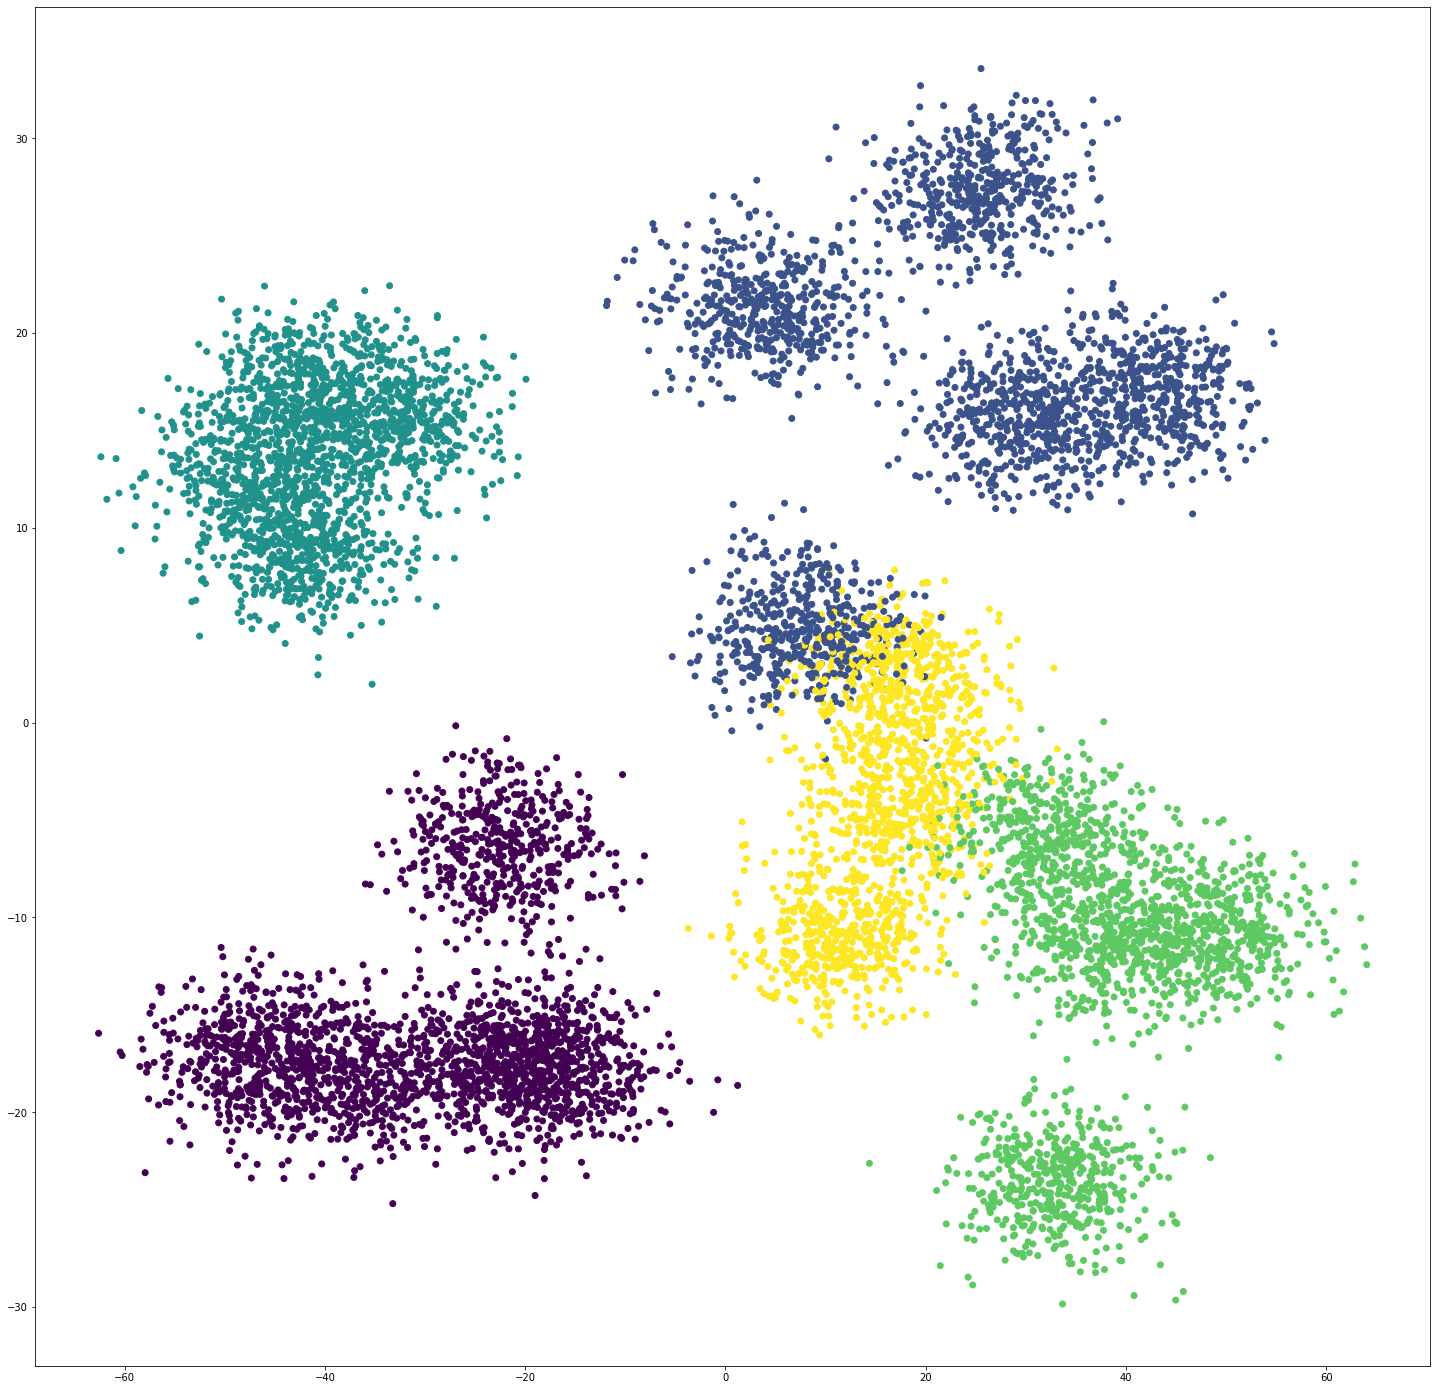

In [63]:
kmeans = KMeans(n_clusters=5) #กำหนดค่าK
kmeans.fit(Data)
H = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1], c=H)

####ทำการหาข้อมูลจำนวนกลุ่มที่เหมาะสม เพื่อหาค่า k ที่เหมาะสมกับข้อมูล

หาค่า k จากวิธี The elbow method

คำนวณหา SEE ของข้อมูล

SSE = Sum of squared Error 

In [65]:
kmeans.inertia_

9038643.647256179

In [66]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(Data)
  SSE.append(kmeans.inertia_)

In [69]:
SSE #เเสดงค่าSSE

[21524218.111485694,
 12632337.932196785,
 11167069.793777393,
 9891203.096140381,
 9065119.372677501,
 8274435.240660477,
 7502514.118302885,
 6973253.226062303]

Text(0, 0.5, 'SSE')

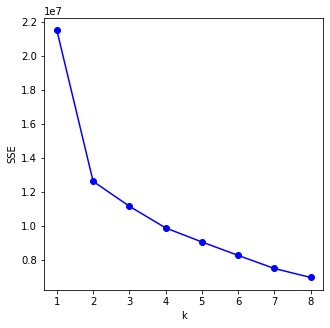

In [71]:
matplotlib.rcParams['figure.figsize']=[5,5] #ทำSSE มาpolt กราฟ
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE')

เมื่อดูจากกราฟมี k  โดยระยะห่างระหว่างจุดที่ 1 จะมีระยะห่างระหว่างจุดใกล้กันกับจุดที่ 2 ดังนั้นค่า k ที่เหมาะสมคือ 2 กลุ่ม 

In [ ]:
kmeans = KMeans(n_clusters=2,random_state=2021) # กำหนด k = 2 
kmeans.fit(Data)
a = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1], c=a)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')

หาค่า K ด้วยวิธี The silhouette coefficient

In [74]:
from sklearn import metrics

In [75]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score) 

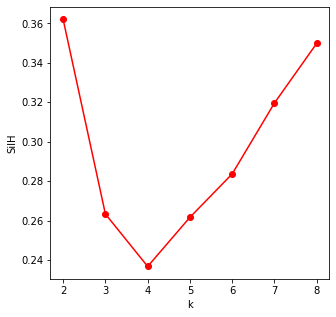

In [79]:
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([2,3,4,5,6,7,8],SilH,'o-r')
plt.xlabel('k')
plt.ylabel('SilH');

จากกราฟจะบอกได้ว่า k มีทั้งหมด 3 กลุ่ม มีระยะห่างแตกต่างกัน ช่วงที่ k เท่ากับ2,3 และ 6 

In [82]:
matplotlib.rcParams['figure.figsize']=[15,20]

Text(0, 0.5, 'Y')

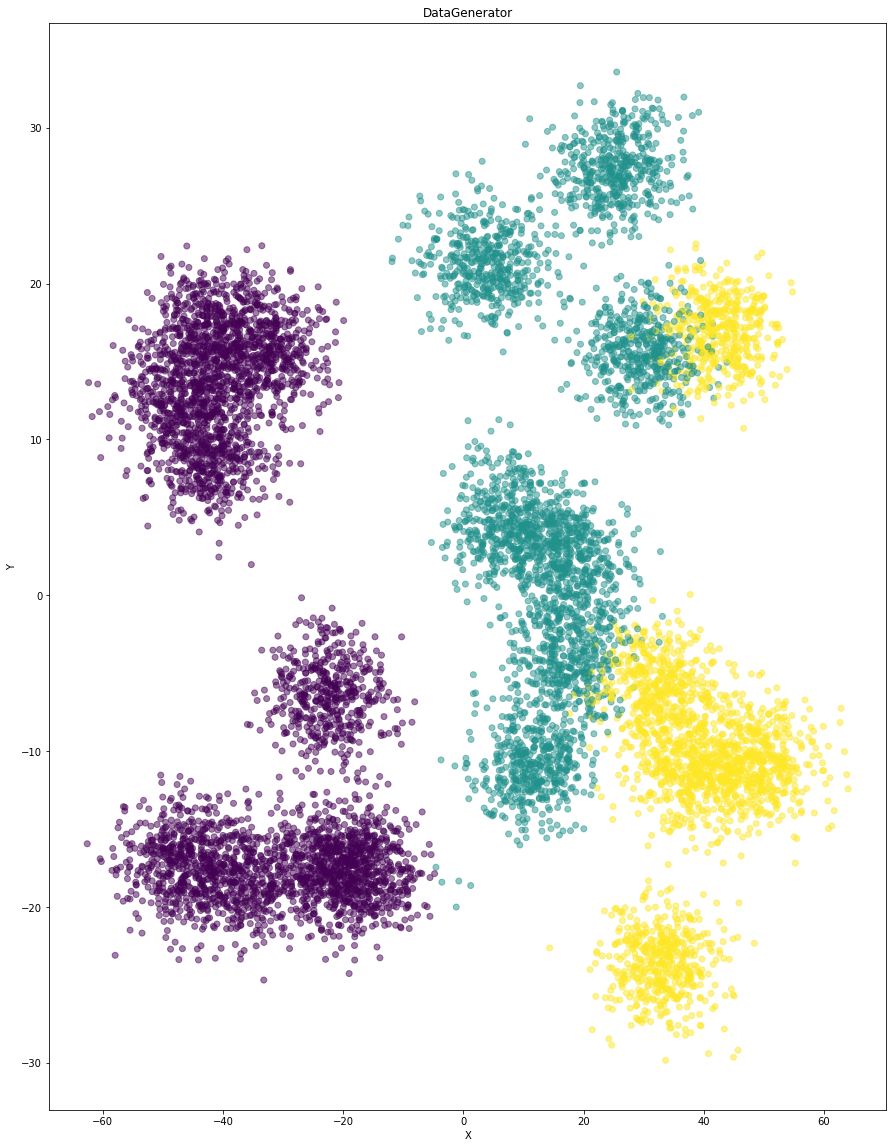

In [96]:
kmeans = KMeans(n_clusters=3,random_state=2021) # กำหนด k = 3 
kmeans.fit(Data)
a = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1], c=a,alpha=0.5)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')

จากกราฟจะเห็นได้ว่าเมื่อกำหนดค่า k = 3 แล้วยังมีข้อมูลกลุ่มสีเขียวเเละสีเหลืองที่มีการซ้อนทับกันเป็นจำนวนมาก เนื่องจากข้อมูลมีปริมาณที่มาก

####3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

MDS

In [86]:
from sklearn.manifold import MDS

In [87]:
mds = MDS(n_components=2)

In [88]:
new_mds = mds.fit_transform(Data)

Text(0, 0.5, 'Y')

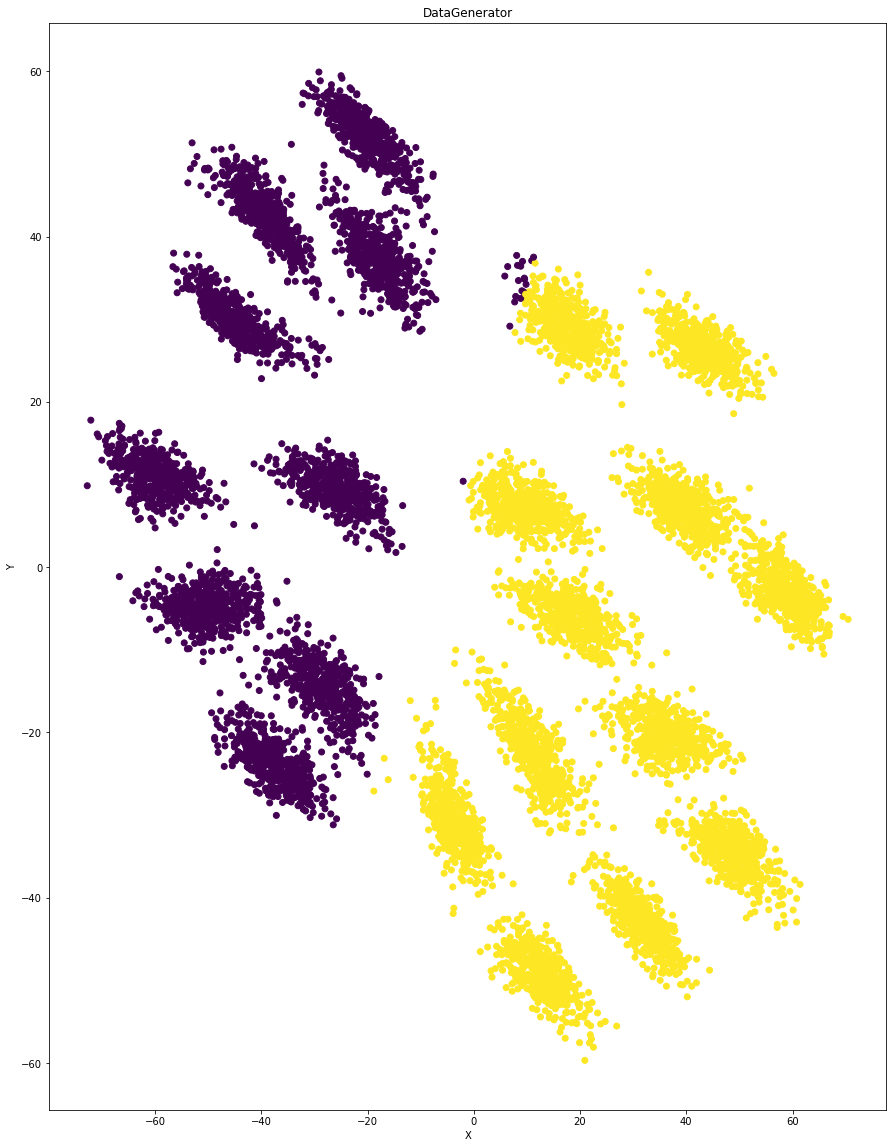

In [91]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(Data)
b = kmeans2.predict(Data)
plt.scatter(new_mds[:,0],new_mds[:,1], c=a)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')

###ทำการเปรียบเทียบระหว่าง 2 เเละ 3

Text(0, 0.5, 'Y')

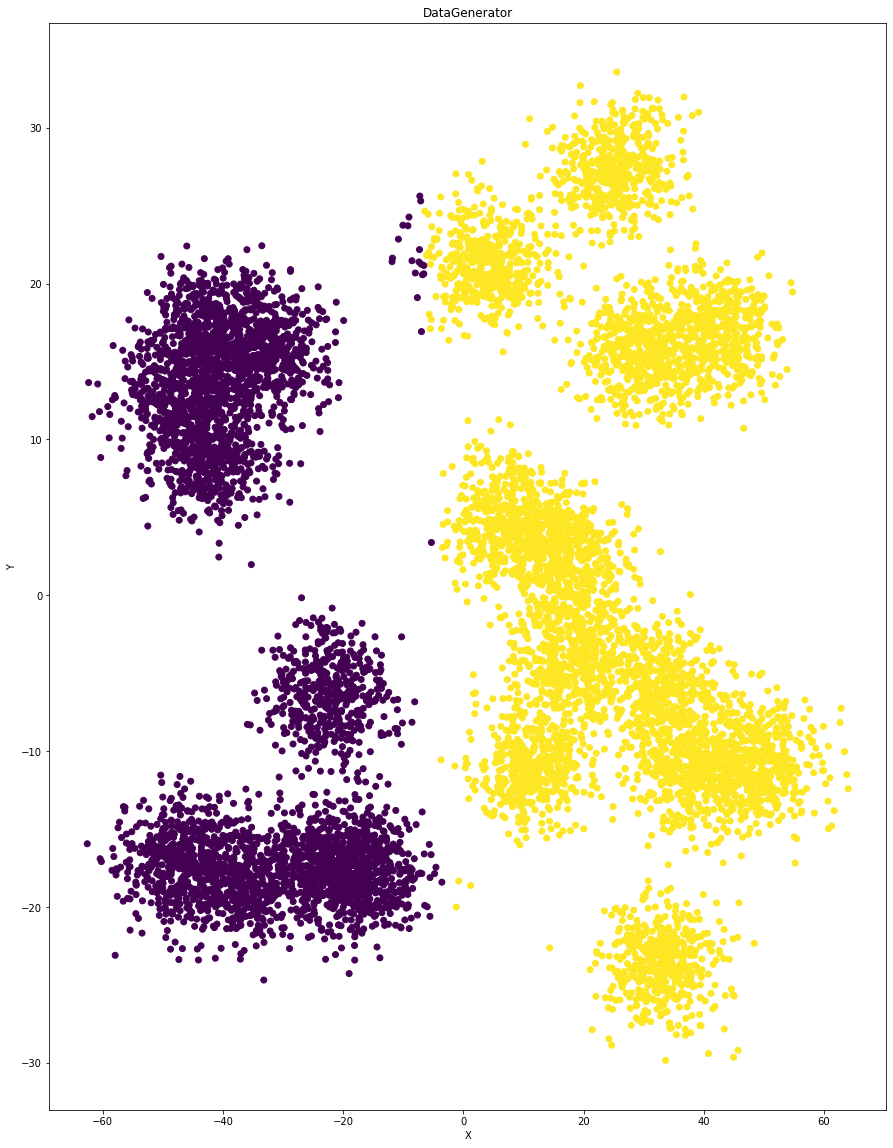

In [90]:
kmeans = KMeans(n_clusters=2,random_state=2021) # กำหนด k = 2 
kmeans.fit(Data)
a = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1], c=a)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

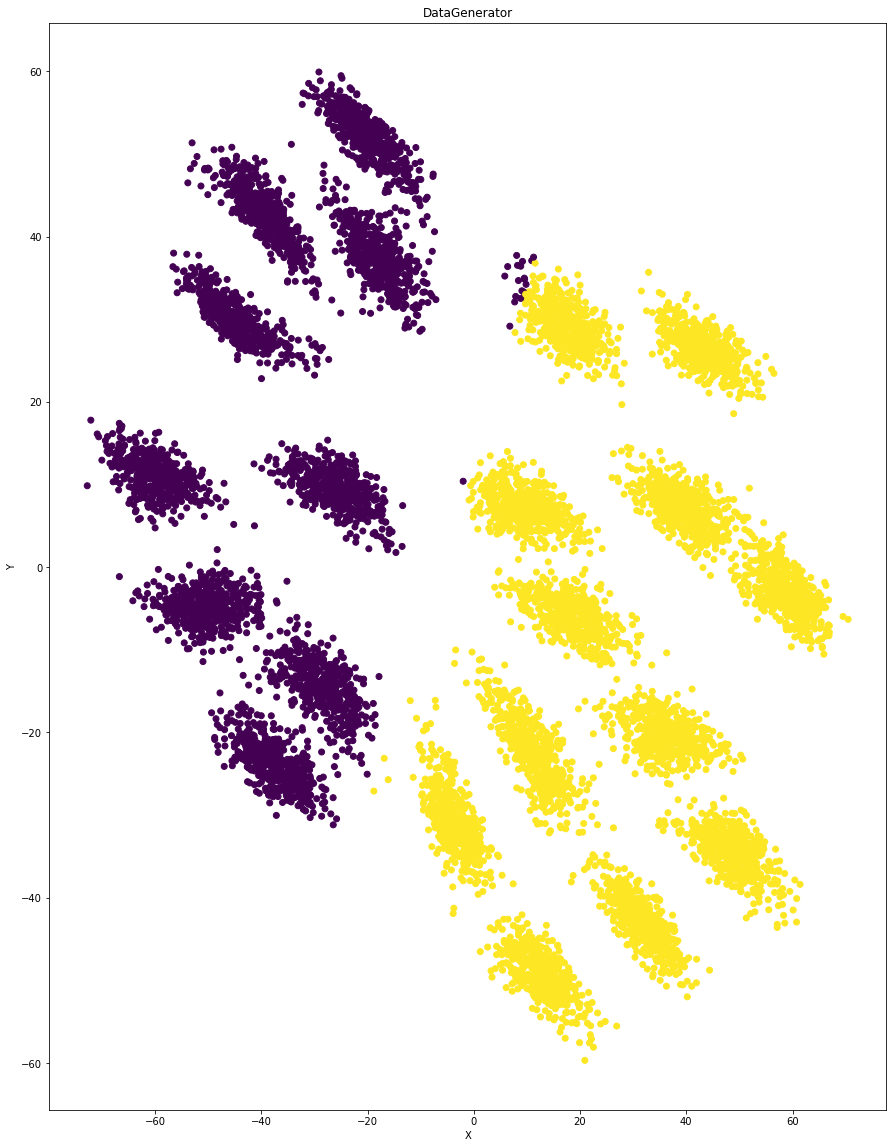

In [92]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(Data)
b = kmeans2.predict(Data)
plt.scatter(new_mds[:,0],new_mds[:,1], c=a)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')